In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from ast import literal_eval


In [2]:
ratings_df = pd.read_csv("G:\\Study\\Szakdolgozat\\input\\ratings.csv")
ratings_df.count()

userId       26024289
movieId      26024289
rating       26024289
timestamp    26024289
dtype: int64

In [3]:
movies_df = pd.read_csv("G:\\Study\\Szakdolgozat\\input\\movies_metadata.csv")

c:\users\dávid\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
movies_df = movies_df[['id','original_title','vote_average','vote_count']]
movies_df.rename(columns={"id" : "movieId"},inplace = True)
movies_df

,movieId,original_title,vote_average,vote_count
0,862,Toy Story,7.7,5415.0
1,8844,Jumanji,6.9,2413.0
2,15602,Grumpier Old Men,6.5,92.0
3,31357,Waiting to Exhale,6.1,34.0
4,11862,Father of the Bride Part II,5.7,173.0
...,...,...,...,...
45461,439050,رگ خواب,4.0,1.0
45462,111109,Siglo ng Pagluluwal,9.0,3.0
45463,67758,Betrayal,3.8,6.0
45464,227506,Satana likuyushchiy,0.0,0.0


In [5]:
each_user_rate_count = ratings_df[['userId','movieId']].groupby('userId').count()

In [6]:
def numberOfMoviesRatedGroup(value):
    if(0 <= value < 5):
        return "Less than 5"
    elif(5<=value<10):
        return "More than 5 less than 10"
    elif(10<=value<20):
        return "More than 10 less than 20"
    elif(20<=value<30):
        return "More than 20 less than 30"
    elif(30<=value<40):
        return "More than 30 less than 40"
    elif(40<=value<=50):
        return "More than 40 less than 50"
    elif(50<=value<60):
        return "More than 50 less than 60"
    elif(60<=value<100):
        return "More than 60 less than 100"
    elif(100<=value<200):
        return "More than 100 less than 200"
    elif(200<value):
        return "More than 200"

In [7]:
each_user_rate_count['count_group'] = each_user_rate_count['movieId'].apply(numberOfMoviesRatedGroup)

In [8]:
each_user_rate_count.groupby('count_group').count()

,movieId
count_group,
Less than 5,14789
More than 10 less than 20,67459
More than 100 less than 200,31346
More than 20 less than 30,30082
More than 200,32811
More than 30 less than 40,18669
More than 40 less than 50,15314
More than 5 less than 10,22204
More than 50 less than 60,10190


<AxesSubplot:xlabel='count_group', ylabel='count'>

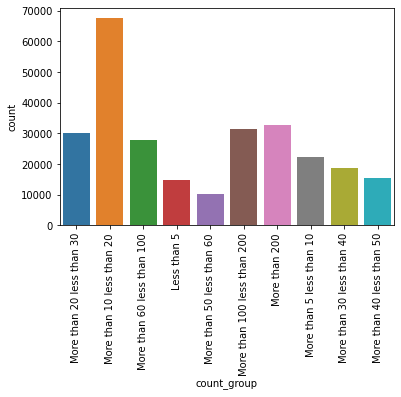

In [9]:
plt.xticks(rotation = 90)
sns.countplot(x='count_group',data = each_user_rate_count)

<AxesSubplot:title={'center':'Movie vote average distribution'}, xlabel='rating', ylabel='count'>

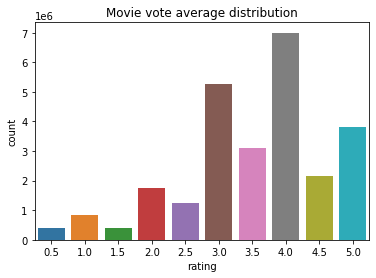

In [10]:
plt.title("Movie vote average distribution")
sns.countplot(x='rating',data = ratings_df)

In [11]:
number_of_voters = ratings_df['userId'].nunique()
number_of_movies = ratings_df['movieId'].nunique()
print("number of unique voters :",number_of_voters,"\nnumber of unique movies :",number_of_movies)

number of unique voters : 270896 
number of unique movies : 45115


In [12]:
top10mostvoted = ratings_df.groupby("movieId").count().reset_index()
top10mostvoted = top10mostvoted.sort_values(["userId"],ascending=[False])[0:15]

In [13]:
movies_df['movieId'] = pd.to_numeric(movies_df['movieId'], errors="coerce")
movies_df.dropna(how="any", inplace=True)
movies_df['movieId'] = movies_df["movieId"].astype(np.int64)

In [14]:
top10mostvoted = top10mostvoted.merge(movies_df[["movieId","original_title"]],on="movieId")

In [15]:
top10mostvoted

,movieId,userId,rating,timestamp,original_title
0,318,91082,91082,91082,The Million Dollar Hotel
1,296,87901,87901,87901,Terminator 3: Rise of the Machines
2,593,84078,84078,84078,Солярис
3,260,77045,77045,77045,The 39 Steps
4,480,74355,74355,74355,Monsoon Wedding
5,527,67662,67662,67662,Once Were Warriors
6,110,66512,66512,66512,Trois couleurs : Rouge
7,2959,60024,60024,60024,License to Wed


In [16]:
user_list = list(each_user_rate_count[each_user_rate_count['count_group'] == "More than 100 less than 200"].reset_index()['userId'])
ratings_df = ratings_df[ratings_df['userId'].isin(user_list)].reset_index()
ratings_df

,index,userId,movieId,rating,timestamp
0,204,8,1,4.0,1013443596
1,205,8,7,2.0,1013442976
2,206,8,44,3.0,1013442518
3,207,8,47,4.0,1013443770
4,208,8,170,3.0,1013442544
...,...,...,...,...,...
4347368,26024004,270894,111759,3.0,1419820550
4347369,26024005,270894,112556,2.0,1419820527
4347370,26024006,270894,112852,2.5,1419820548
4347371,26024007,270894,115569,2.5,1419820542


In [43]:
test_data = ratings_df[0:1250]
test_data

,index,userId,movieId,rating,timestamp
0,204,8,1,4.0,1013443596
1,205,8,7,2.0,1013442976
2,206,8,44,3.0,1013442518
3,207,8,47,4.0,1013443770
4,208,8,170,3.0,1013442544
...,...,...,...,...,...
1245,6564,63,4878,0.5,1198545512
1246,6565,63,4973,5.0,1198545461
1247,6566,63,4993,2.0,1198545605
1248,6567,63,5225,3.5,1198546972


In [44]:
matrix = test_data.pivot(index="userId",columns="movieId",values="rating")

In [45]:
matrix

movieId,1,7,10,11,16,17,19,24,32,39,...,117176,117529,119145,120466,122892,122904,134130,134853,135567,135569
userId,,,,,,,,,,,,,,,,,,,,,
8,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,...,NaN,NaN,4.0,4.5,4.0,4.0,4.0,3.0,4.0,4.5
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,3.5,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,4.5,5.0,5.0,NaN,5.0,NaN,NaN,4.0,NaN,NaN
53,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,5.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,3.5,NaN,NaN,NaN,3.0,NaN,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
def MatrixFactorization(ratingMatrix, userMatrix, itemMatrix, feature, steps=1000, learning_rate=0.004, bias=0.03):
    itemMatrix = itemMatrix.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # calculate error
                    e_ij = ratingMatrix[i][j] - np.dot(userMatrix[i,:],itemMatrix[:,j])

                    for k in range(feature):
                        
                        userMatrix[i][k] = userMatrix[i][k] + learning_rate * (2 * e_ij * itemMatrix[k][j] - bias * userMatrix[i][k])
                        itemMatrix[k][j] = itemMatrix[k][j] + learning_rate * (2 * e_ij * userMatrix[i][k] - bias * itemMatrix[k][j])


        after_gradient_error = 0

        for i in range(len(ratingMatrix)):

            for j in range(len(ratingMatrix[i])):

                if ratingMatrix[i][j] > 0:

                    after_gradient_error = after_gradient_error + pow(ratingMatrix[i][j] - np.dot(userMatrix[i,:],itemMatrix[:,j]), 2)

                    for k in range(feature):

                        after_gradient_error = after_gradient_error + (bias/2) * (pow(userMatrix[i][k],2) + pow(itemMatrix[k][j],2))
        
        print("{} step : {} error".format(step,after_gradient_error))
        # minimum before steps reached
        if after_gradient_error < 0.01:

            break

    return userMatrix, itemMatrix.T

In [ ]:
def neighbourMethod(ratingMatrix):
    """
    """